# magUniverse Quickstart Guide

This notebook will guide you through the basics of using magUniverse to access and work with magnetic field data from publications of various astronomical surveys. We'll cover:

1. Exploring available data sources
2. Loading data from different publications
3. Working with the data using pandas

## 1. Exploring Available Data Sources

magUniverse provides access to three types of data:
1. Zeeman measurements
2. Polarization measurements
3. Gas properties

Let's look at what sources are available in each category:

In [1]:
import json         # use json for pretty printing
from maguniverse.data import (zeeman_sources, 
                              polarization_sources
                              )

# Print first item in polarization_sources
print("\nFirst Polarization Source:")
print(json.dumps(list(polarization_sources.values())[0], indent=4))
# Print first item in zeeman_sources
print("\nFirst Zeeman Source:")
print(json.dumps(list(zeeman_sources.values())[0], indent=4))


First Polarization Source:
{
    "title": "350 \u03bcm Polarimetry from the Caltech Submillimeter Observatory",
    "authors": "J. L. Dotson, J. E. Vaillancourt, L. Kirby et al.",
    "year": 2010,
    "paper_link": "https://iopscience.iop.org/article/10.1088/0067-0049/186/2/406",
    "doi": "10.1088/0067-0049/186/2/406",
    "instrument": "CSO / Hertz 350 \u03bcm polarimeter",
    "data_link": {
        "CDS": "https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=10.1088/0067-0049/186/2/406",
        "t1_object_list_ascii": "https://iopscience.iop.org/0067-0049/186/2/406/suppdata/apjs333144t1_ascii.txt?doi=10.1088/0067-0049/186/2/406",
        "t2_data_table_ascii": "https://content.cld.iop.org/journals/0067-0049/186/2/406/revision1/apjs333144t2_mrt.txt",
        "t1_object_list_local": "datafiles/polarization/dotson2010_t1.txt",
        "t2_data_table_local": "datafiles/polarization/dotson2010_t2.txt"
    }
}

First Zeeman Source:
{
    "title": "Magnetic Fields in Interstellar Clou

## 2. Loading Data

magUniverse provides two ways to access data:
1. Local files
2. Remote URLs

When both local and remote files are provided, the package automatically tries to use local files first, and falls back to remote URLs if needed. Some remote sources may require CAPTCHA verification - in such cases, the package will open your browser to complete the verification. You may need to download the files manually and try again with a complete directory reference to the donwloaded file.

You will find an auto-generated webpage of all available sources and their dictionary keys in magUniverse Paper Collection at: https://xli2522.github.io/magUniverse/ . This page refreshes whenever new sources are added.

Let's load some example data:

## 2.1 Simplest Ways of Getting Tables Using magUniverse Service Getters

You can access and donwload data tables using magUniverse's preset service getters:
1. (NO CODE) via [magUniverse Paper Collection Website's table getter](https://xli2522.github.io/magUniverse/)
2. (Simple Code) via maguniverse.service.get

Simple code demo:

In [2]:
# (Simple Code) via maguniverse.service.get
# Let's import the getters service
from maguniverse.service.get import getters

# Initialize the getter service 
service = getters()

### 2.2 Loading Polarization Data

Now let's look at the Dotson et al. (2010) polarization measurements. You will find on https://xli2522.github.io/magUniverse/ that the dictionary key for Dotson et al. (2010) is *Dotson2010*. This dataset contains dust polarization measurements at 350 μm from the Caltech Submillimeter Observatory.

In [3]:
# Check Dotson2010 data links
print(json.dumps(dotson_data := polarization_sources['Dotson2010']['data_link'], indent=4))

{
    "CDS": "https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=10.1088/0067-0049/186/2/406",
    "t1_object_list_ascii": "https://iopscience.iop.org/0067-0049/186/2/406/suppdata/apjs333144t1_ascii.txt?doi=10.1088/0067-0049/186/2/406",
    "t2_data_table_ascii": "https://content.cld.iop.org/journals/0067-0049/186/2/406/revision1/apjs333144t2_mrt.txt",
    "t1_object_list_local": "datafiles/polarization/dotson2010_t1.txt",
    "t2_data_table_local": "datafiles/polarization/dotson2010_t2.txt"
}


Dotson et al. 2010 Table 1 outlines the targets of their analysis; Table 2 lists all of the polarization data. Let's get Table 2 (current magUniverse get_*.py routines only support data tables ):

In [4]:
# Load polarization data Dotson et al. 2010 table 2 directly using the preset service getter
pol_df = service.dotson2010_t2()
print("Polarization Data Sample:")
print(pol_df.head())

# Print the columns and shape of the DataFrame
print("\nColumns:", pol_df.columns.tolist())
print("\nData Shape:", pol_df.shape)

INFO: Starting proxy fallback for: https://content.cld.iop.org/journals/0067-0049/186/2/406/revision1/apjs333144t2_mrt.txt
INFO: Attempt 1/3: Trying direct access
INFO: ✓ SUCCESS with direct access!


Polarization Data Sample:
        ID  ΔR.A.  ΔDecl.   Δx   Δy      P  sigma(P)  theta  sigma(theta)  \
0  NGC_253    -71     -18 -4.0 -1.0  14.28     21.54  177.8          43.5   
1  NGC_253    -71       0 -4.0  0.0  13.52     22.40  147.0          46.9   
2  NGC_253    -53     -36 -3.0 -2.0  18.78     17.91   37.5          27.2   
3  NGC_253    -53     -18 -3.0 -1.0   0.68      8.41   85.2         355.2   
4  NGC_253    -53       0 -3.0  0.0   6.65      5.68  131.8          24.7   

   Intensity  sigma(Intensity)  Number of Observations  
0        9.0               2.0                       7  
1        6.2               2.0                       7  
2        4.8               0.5                      11  
3        8.9               0.6                      14  
4       13.0               0.8                      15  

Columns: ['ID', 'ΔR.A.', 'ΔDecl.', 'Δx', 'Δy', 'P', 'sigma(P)', 'theta', 'sigma(theta)', 'Intensity', 'sigma(Intensity)', 'Number of Observations']

Data Shape: (4372, 

### 2.3 Loading Zeeman Data

Let's load the Crutcher et al. (2010) Zeeman measurements. This dataset contains magnetic field measurements using the Zeeman effect in various molecular clouds. Again, you will find the dictionary key for Crutcher et al. (2010) is *Crutcher2010* on https://xli2522.github.io/magUniverse/ .

In [5]:
# Check Crutcher2010 data links
print(json.dumps(crutcher_data := zeeman_sources['Crutcher2010']['data_link'], indent=4))

{
    "table1_ascii": "https://iopscience.iop.org/0004-637X/725/1/466/suppdata/apj333303t1_ascii.txt?doi=10.1088/0004-637X/725/1/466",
    "table1_local": "datafiles/zeeman/crutcher2010.txt"
}


In [6]:
# Load Zeeman data Crutcher et al. 2010 table 1
zeeman_df = service.crutcher2010_t1()
print("Zeeman Data Sample:")
print(zeeman_df.head())

# Print the columns and shape of the DataFrame
print("\nColumns:", zeeman_df.columns.tolist())
print("\nData Shape:", zeeman_df.shape)

INFO: Starting proxy fallback for: https://iopscience.iop.org/0004-637X/725/1/466/suppdata/apj333303t1_ascii.txt?doi=10.1088/0004-637X/725/1/466
INFO: Attempt 1/3: Trying direct access


INFO: ✓ SUCCESS with direct access!


Zeeman Data Sample:
           Name Species  Ref  n_H (cm^-3)  B_Z (muG)  sigma (muG)
0          W3OH     OH*    1   13000000.0     3100.0        400.0
1  SgrB2(north)     H I    1       5000.0     -480.0         51.0
2   SgrB2(main)     H I    1      63000.0      550.0         59.0
3      W3(main)     H I    1     630000.0      400.0         20.0
4          S106      OH    1     400000.0      400.0         23.0

Columns: ['Name', 'Species', 'Ref', 'n_H (cm^-3)', 'B_Z (muG)', 'sigma (muG)']

Data Shape: (136, 6)


## 3. Working with the Data

The data is returned as pandas DataFrames, which makes it easy to analyze and manipulate. Here are some basic operations you can perform:

In [7]:
# Basic statistics on Zeeman measurements
print("Zeeman Data Statistics:")
print(zeeman_df[["n_H (cm^-3)", "B_Z (muG)", "sigma (muG)"]].describe())

# Filter polarization data to find high polarization measurements
high_p = pol_df[pol_df['P'] > pol_df['P'].median()]
print("\nNumber of measurements with above-median polarization:", len(high_p))
print("Median polarization percentage:", pol_df['P'].median())

# Basic statistics on polarization angles
print("\nPolarization Angle Statistics:")
print(pol_df[['theta', 'sigma(theta)']].describe())

Zeeman Data Statistics:
        n_H (cm^-3)    B_Z (muG)  sigma (muG)
count  1.360000e+02   136.000000   136.000000
mean   2.450588e+05    31.922059    23.914706
std    1.244713e+06   313.633761    66.802553
min    9.100000e+00  -710.000000     0.600000
25%    5.775000e+01    -3.125000     2.200000
50%    1.250000e+03     1.250000     3.750000
75%    4.200000e+03     5.725000     6.425000
max    1.300000e+07  3100.000000   400.000000

Number of measurements with above-median polarization: 2178
Median polarization percentage: 1.46

Polarization Angle Statistics:
             theta  sigma(theta)
count  4372.000000   4372.000000
mean     87.925686     17.027585
std      52.343176     35.815119
min       0.000000      0.300000
25%      41.800000      5.200000
50%      84.800000      9.700000
75%     135.000000     18.300000
max     180.000000   1358.100000


### 3.1 Data Visualization Example

Let's create a simple scatter plot of magnetic field strength vs. gas density from the Zeeman data:

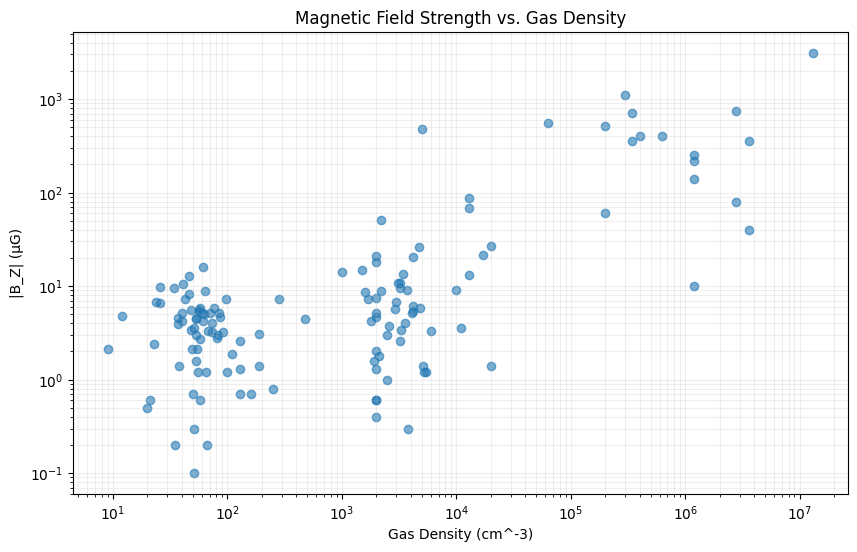

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(zeeman_df['n_H (cm^-3)'], abs(zeeman_df['B_Z (muG)']), alpha=0.6)
plt.xlabel('Gas Density (cm^-3)')
plt.ylabel('|B_Z| (μG)')
plt.title('Magnetic Field Strength vs. Gas Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', ls='-', alpha=0.2)
plt.show()

## 4. Saving Data Locally
Each maguniverse.service.get getter saves loaded pandas dataframes to ../datafiles by default.

You can also save your own pandas dataframes locally for faster access in the future:

In [9]:
import os

# Example of saving data locally
output_dir = os.path.join('..', 'datafiles')
os.makedirs(output_dir, exist_ok=True)

# Save Zeeman data
zeeman_path = os.path.join(output_dir, 'zeeman', 'crutcher2010_processed.txt')
os.makedirs(os.path.dirname(zeeman_path), exist_ok=True)
zeeman_df.to_csv(zeeman_path, index=False)

# Save polarization data
pol_path = os.path.join(output_dir, 'polarization', 'dotson2010_processed.txt')
os.makedirs(os.path.dirname(pol_path), exist_ok=True)
pol_df.to_csv(pol_path, index=False)

print("Data saved to:")
print(f"- {zeeman_path}")
print(f"- {pol_path}")

Data saved to:
- ..\datafiles\zeeman\crutcher2010_processed.txt
- ..\datafiles\polarization\dotson2010_processed.txt


## Next Steps

Now that you're familiar with the basics, you can:
1. Explore other data sources in each category
2. Combine data from different sources for analysis
3. Create more sophisticated visualizations of the magnetic field measurements
4. Perform statistical analysis on the data
5. Use the data for your own research projects

Check the repository files for more details on available data sources and their properties.